Importing required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data set

In [2]:
df=pd.read_csv("kidney_disease_dataset.csv")

In [3]:
df

,Age,Creatinine_Level,BUN,Diabetes,Hypertension,GFR,Urine_Output,CKD_Status,Dialysis_Needed
0,71,0.30,40.9,0,1,46.8,1622.0,1,0
1,34,1.79,17.1,0,0,43.8,1428.0,1,0
2,80,2.67,15.0,0,1,78.2,1015.0,1,0
3,40,0.97,31.1,0,1,92.8,1276.0,1,0
4,43,2.05,22.8,1,1,62.2,1154.0,0,0
...,...,...,...,...,...,...,...,...,...
2299,89,1.11,5.0,1,0,55.1,1344.0,1,0
2300,89,0.30,5.0,0,0,47.5,2156.0,1,0
2301,84,0.30,7.3,1,0,120.0,1353.0,0,0
2302,24,1.58,26.4,1,0,75.6,1067.0,0,0


Feature Extraction

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               2304 non-null   int64  
 1   Creatinine_Level  2304 non-null   float64
 2   BUN               2304 non-null   float64
 3   Diabetes          2304 non-null   int64  
 4   Hypertension      2304 non-null   int64  
 5   GFR               2304 non-null   float64
 6   Urine_Output      2304 non-null   float64
 7   CKD_Status        2304 non-null   int64  
 8   Dialysis_Needed   2304 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 162.1 KB


In [5]:
#the data was cleaned not contain any null values in it
df.isna().sum()

Age                 0
Creatinine_Level    0
BUN                 0
Diabetes            0
Hypertension        0
GFR                 0
Urine_Output        0
CKD_Status          0
Dialysis_Needed     0
dtype: int64

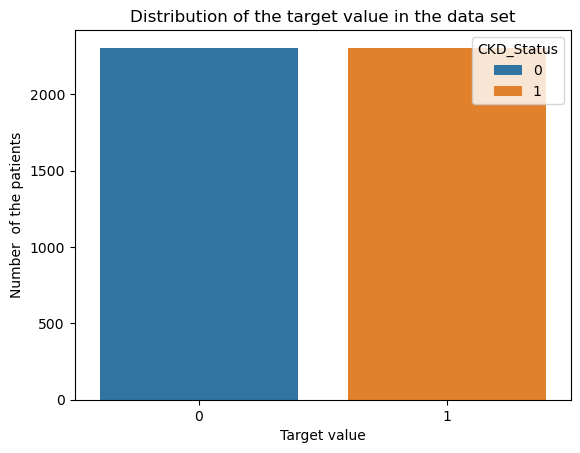

In [6]:
#Destribution of the target variable
sns.barplot(data=df,x="CKD_Status",y=df["CKD_Status"].count(), hue="CKD_Status")
plt.title("Distribution of the target value in the data set")
plt.xlabel("Target value")
plt.ylabel("Number  of the patients")
plt.show()

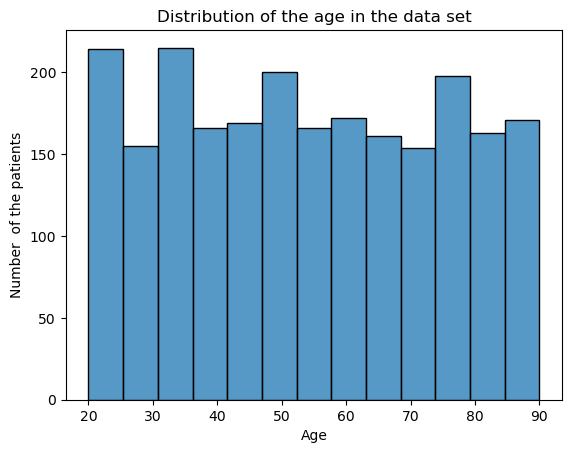

In [7]:
#distribution of numeric columns like age
sns.histplot(data=df,x="Age")
plt.title("Distribution of the age in the data set")
plt.xlabel("Age")
plt.ylabel("Number  of the patients")
plt.show()

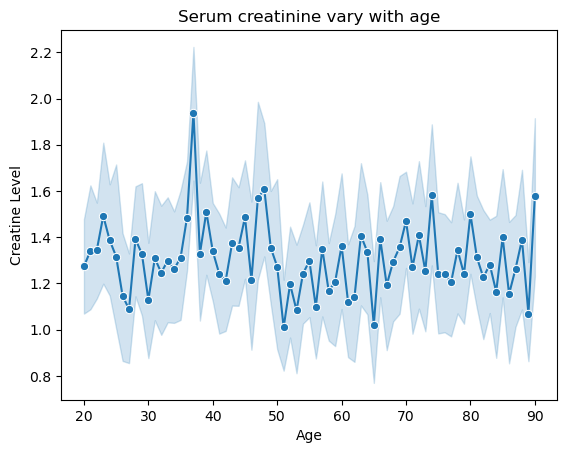

In [8]:
#How does serum creatinine vary with age?
sns.lineplot(data=df,x="Age",y="Creatinine_Level",marker="o")
plt.title("Serum creatinine vary with age")
plt.xlabel("Age")
plt.ylabel("Creatine Level")
plt.show()

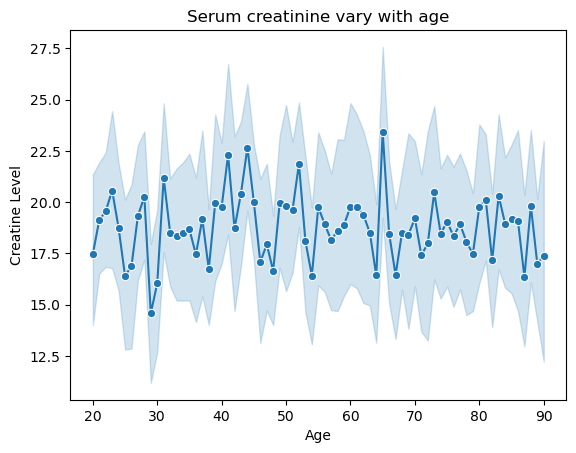

In [9]:
#Is there a difference in blood pressure between patients with and without kidney disease?
sns.lineplot(data=df,x="Age",y="BUN",marker="o")
plt.title("Serum creatinine vary with age")
plt.xlabel("Age")
plt.ylabel("Creatine Level")
plt.show() #by  plting it is observed that between age 60-70 BUN level is high

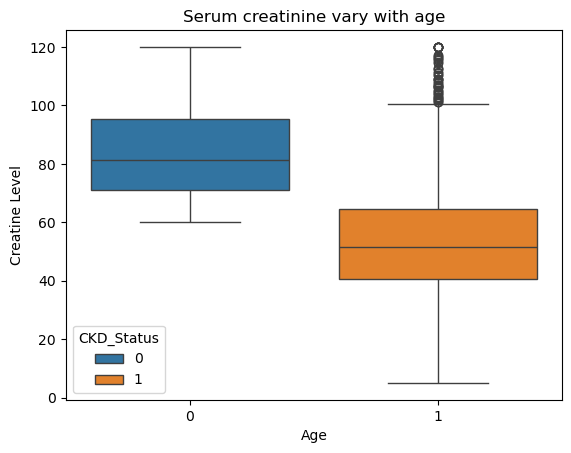

In [10]:
#Is GFR lower in CKD patients
sns.boxplot(data=df,x="CKD_Status",y="GFR", hue="CKD_Status")
plt.title("Serum creatinine vary with age")
plt.xlabel("Age")
plt.ylabel("Creatine Level")
plt.show()  #yes it is observed that GFR lower in CKD patients

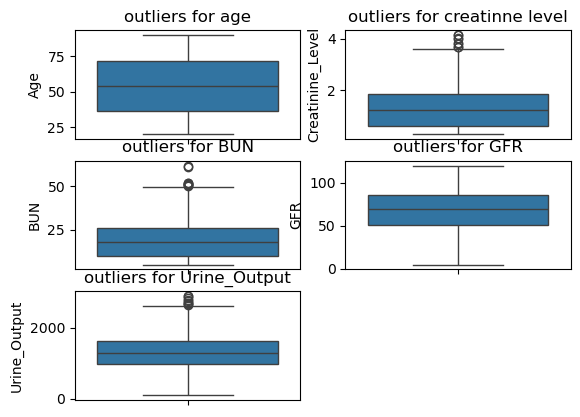

It is observed that column creatine_level,BUN,GFR contain the outliers


In [11]:
#Which columns have outliers? Visualize them using box plots.
plt.subplot(3,2,1)
sns.boxplot(data=df["Age"])
plt.title("outliers for age")

plt.subplot(3,2,2)
sns.boxplot(data=df["Creatinine_Level"])
plt.title("outliers for creatinne level")

plt.subplot(3,2,3)
sns.boxplot(data=df["BUN"])
plt.title("outliers for BUN")

plt.subplot(3,2,4)
sns.boxplot(data=df["GFR"])
plt.title("outliers for GFR")

plt.subplot(3,2,5)
sns.boxplot(data=df["Urine_Output"])
plt.title("outliers for Urine_Output")
plt.show()

print("It is observed that column creatine_level,BUN,GFR contain the outliers")

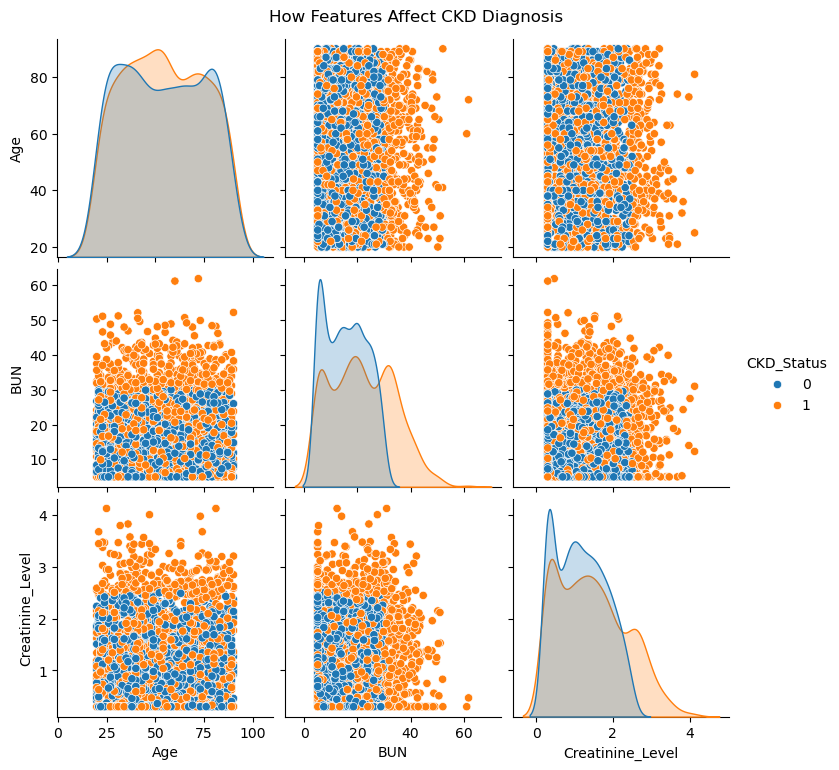

In [12]:
# Select relevant features + target
subset = df[["Age", "BUN", "Creatinine_Level", "CKD_Status"]]

# Pairplot
sns.pairplot(subset, hue="CKD_Status")
plt.suptitle("How Features Affect CKD Diagnosis", y=1.02)
plt.show()


In [13]:
# Check for duplicate rows
df.duplicated().sum()

0

Importing all required model

Here we are using 4 algorithm 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score

Spliting the data into 2 parts one for input_columns and other one for output_column or traget variable

In [15]:
df.columns

Index(['Age', 'Creatinine_Level', 'BUN', 'Diabetes', 'Hypertension', 'GFR',
       'Urine_Output', 'CKD_Status', 'Dialysis_Needed'],
      dtype='object')

In [16]:
#for input
x=df[['Age', 'Creatinine_Level', 'BUN', 'Diabetes', 'Hypertension', 'GFR',
       'Urine_Output']]

In [17]:
#for output
y=df['CKD_Status']

spliting the data into training and testing phase

In [18]:
#BY the help of the for loop we found that at random state 87 we found the best accuracy for all model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=87)

Model Calling

In [19]:
#KNN model calling
model_knn=KNeighborsClassifier()

In [20]:
#NB model calling
model_NB=GaussianNB()

In [21]:
#LogisticRegression model calling
model_lr=LogisticRegression(max_iter=1000)

In [22]:
#SVM model calling
model_svm=SVC()

Training the input x_train,y_train data on all 4 model called

In [23]:
model_knn.fit(x_train,y_train)
model_NB.fit(x_train,y_train)
model_lr.fit(x_train,y_train)
model_svm.fit(x_train,y_train)

SVC()

Predicting model output for all model

In [24]:
y_pred_knn=model_knn.predict(x_test)
y_pred_NB=model_NB.predict(x_test)
y_pred_lr=model_lr.predict(x_test)
y_pred_svm=model_svm.predict(x_test)

Determining the accuracy for all 4 model output

In [25]:
from sklearn.metrics import precision_score

print("For KNeighborsClassifier")
print(accuracy_score(y_test, y_pred_knn))
print("----------------------------------------------")
print("For Naive_bayes")
print(accuracy_score(y_test, y_pred_NB))
print("----------------------------------------------")
print("For LogisticRegression")
print(accuracy_score(y_test, y_pred_lr))
print("----------------------------------------------")
print("For SVM")
print(accuracy_score(y_test, y_pred_svm))



For KNeighborsClassifier
0.8156182212581344
----------------------------------------------
For Naive_bayes
0.913232104121475
----------------------------------------------
For LogisticRegression
0.8221258134490239
----------------------------------------------
For SVM
0.7635574837310195


Now with the help of the for loop we are going to find best random state value for all model to get best accuracy

For KNeighborsClassifier

In [26]:
knn=[]
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    model_knn.fit(x_train,y_train)
    y_pred_knn=model_knn.predict(x_test)
    accu=accuracy_score(y_test, y_pred_knn)
    knn.append(accu)

print(f"for KNN model the best accuracy is {max(knn)} for random state value {knn.index(max(knn))}")

for KNN model the best accuracy is 0.841648590021692 for random state value 97


For Naive_bayes

In [27]:
NB=[]
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    model_NB.fit(x_train,y_train)
    y_pred_NB=model_NB.predict(x_test)
    accu=accuracy_score(y_test, y_pred_NB)
    NB.append(accu)

print(f"for Naive_bayes model the best accuracy is {max(knn)} for random state value {knn.index(max(knn))}")

for Naive_bayes model the best accuracy is 0.841648590021692 for random state value 97


For LogisticRegression

In [ ]:
lr=[]
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    model_lr.fit(x_train,y_train)
    y_pred_lr=model_lr.predict(x_test)
    accu=accuracy_score(y_test, y_pred_lr)
    lr.append(accu)

print(f"for LogisticRegression model the best accuracy is {max(knn)} for random state value {knn.index(max(knn))}")

For SVM

In [ ]:
svm=[]
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    model_svm.fit(x_train,y_train)
    y_pred_svm=model_svm.predict(x_test)
    accu=accuracy_score(y_test, y_pred_svm)
    svm.append(accu)

print(f"for SVM model the best accuracy is {max(knn)} for random state value {knn.index(max(knn))}")

Model dumping and loading

In [ ]:
#for now we considered the avm model for better accuracy
import joblib

joblib.dump(model_svm,"model.pkl")

In [ ]:
#loading the predicted model

joblib.load("model.pkl")